In [1]:
# Carregando bibliotecas básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leitura do arquivo de dados
df = pd.read_csv('dados_filtrados.csv', header = 0, decimal = '.', sep = ",")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18306 entries, 0 to 18305
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         18306 non-null  int64  
 1   TP_ESCOLA          18306 non-null  int64  
 2   TP_PRESENCA_CH     18306 non-null  int64  
 3   TP_PRESENCA_CN     18306 non-null  int64  
 4   TP_PRESENCA_LC     18306 non-null  int64  
 5   NU_IDADE           18306 non-null  int64  
 6   TP_ST_CONCLUSAO    18306 non-null  int64  
 7   TP_ANO_CONCLUIU    18306 non-null  int64  
 8   TP_ENSINO          5762 non-null   float64
 9   IN_TREINEIRO       18306 non-null  int64  
 10  NU_NOTA_CN         13783 non-null  float64
 11  NU_NOTA_CH         13783 non-null  float64
 12  NU_NOTA_LC         13510 non-null  float64
 13  NU_NOTA_MT         10133 non-null  float64
 14  TP_STATUS_REDACAO  13510 non-null  float64
 15  NU_NOTA_REDACAO    13510 non-null  float64
dtypes: float64(7), int64(9

In [4]:
df.head()

,Unnamed: 0,TP_ESCOLA,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_IDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ENSINO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,0,1,1,1,1,24,1,4,NaN,0,436.3,495.4,581.2,399.4,1.0,520.0
1,1,2,1,1,1,17,2,0,1.0,0,474.5,544.1,599.0,459.8,1.0,580.0
2,2,1,0,0,0,21,3,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,0,0,0,25,1,9,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,0,0,0,28,1,4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


Unnamed: 0               0
TP_ESCOLA                0
TP_PRESENCA_CH           0
TP_PRESENCA_CN           0
TP_PRESENCA_LC           0
NU_IDADE                 0
TP_ST_CONCLUSAO          0
TP_ANO_CONCLUIU          0
TP_ENSINO            12544
IN_TREINEIRO             0
NU_NOTA_CN            4523
NU_NOTA_CH            4523
NU_NOTA_LC            4796
NU_NOTA_MT            8173
TP_STATUS_REDACAO     4796
NU_NOTA_REDACAO       4796
dtype: int64


<AxesSubplot:>

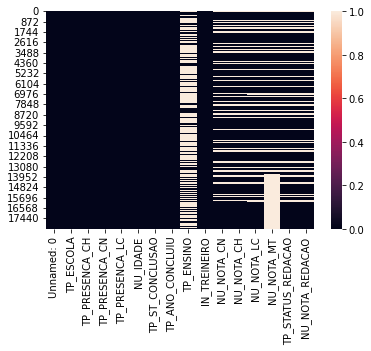

In [5]:
# Há dados faltantes?
# Counting NaN values in all columns
print(df.isna().sum())
# Heatmap com a distribuição de valores faltantes
sns.heatmap(df.isnull())

In [6]:
# Se utilizarmos apenas as linhas com dados completos, quantas linhas vão sobrar?
df_clean = df.dropna(axis = 0, how = 'any', inplace = False)
print(len(df_clean), 'linhas restantes de um total de', len(df), 'linhas')
print(100*len(df_clean)/len(df),'%')

3628 linhas restantes de um total de 18306 linhas
19.818638697694745 %


In [7]:
# Avaliando correlações

# sns.pairplot(df)

<AxesSubplot:>

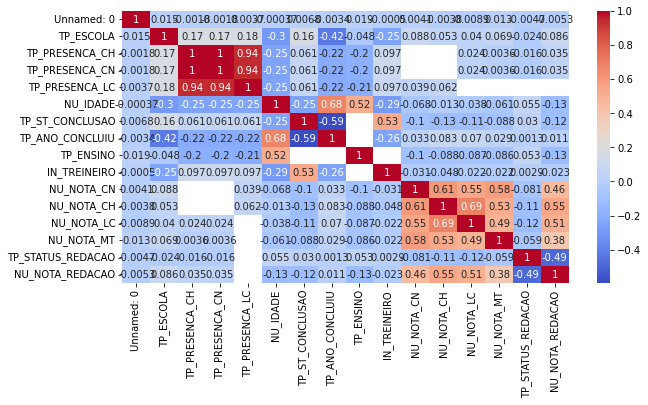

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Analisando a variável 'TP_ESCOLA':

- 1: Não Respondeu
- 2: Pública
- 3: Privada
- 4: Exterior

In [9]:
df['TP_ESCOLA'].value_counts()

1    12543
2     4986
3      776
4        1
Name: TP_ESCOLA, dtype: int64

<AxesSubplot:title={'center':'TP_ESCOLA'}>

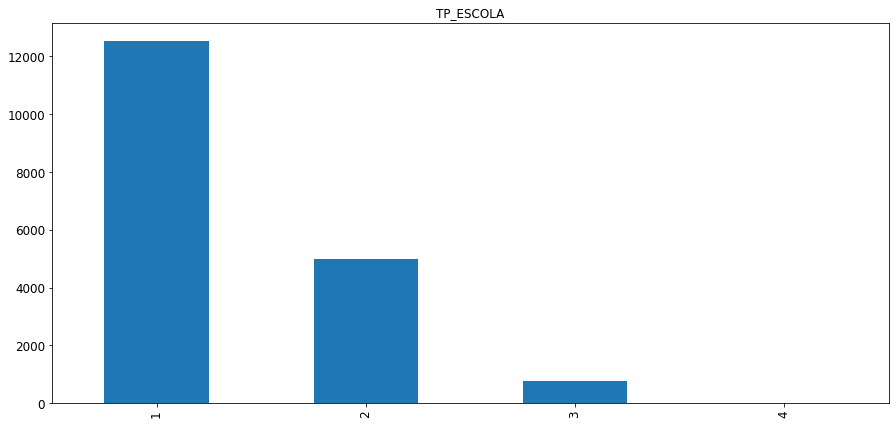

In [10]:
df['TP_ESCOLA'].value_counts().plot(kind='bar', figsize=(15,7), title='TP_ESCOLA', fontsize=12)

In [11]:
12543/18306 * 100

68.51851851851852

No important information, let's delete it:

In [12]:
df = df.drop(columns=['TP_ESCOLA'])

TP_ANO_CONCLUIU:

- 0: Não informado
- 1 a 9: 2015 a 2007 (descrescente)
- 10: anterior a 2007

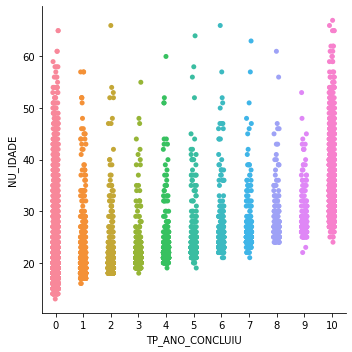

In [13]:
## Normalized Distribution

sns.catplot(x='TP_ANO_CONCLUIU', y='NU_IDADE', data=df)

In [14]:
df['TP_ANO_CONCLUIU'].value_counts()

0     9654
1     2071
10    1542
2     1379
3      944
4      750
5      513
6      493
7      386
8      306
9      268
Name: TP_ANO_CONCLUIU, dtype: int64

In [15]:
1379/18306

0.07533049273462253

<AxesSubplot:title={'center':'TP_ANO_CONCLUIU'}>

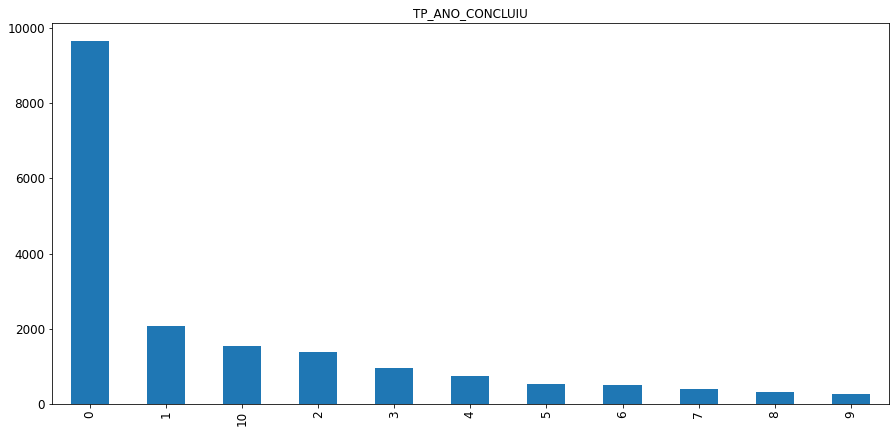

In [16]:
df['TP_ANO_CONCLUIU'].value_counts().plot(kind='bar', figsize=(15,7), title='TP_ANO_CONCLUIU', fontsize=12)

52,73% - 'Não informado'

11,31% - 2015

8,42% - 'Anterior a 2007'

7,53% - 2014

No relevant information

In [17]:
df = df.drop(columns=['TP_ANO_CONCLUIU'])

IN_TREINEIRO:

Intuito de treinar?

- 1: Sim
- 0: Não

In [18]:
df['IN_TREINEIRO'].value_counts()

0    15940
1     2366
Name: IN_TREINEIRO, dtype: int64

In [19]:
2366/18306 * 100

12.924724134163663

TP_ST_CONCLUSAO:

- 1: Já concluí o Ensino Médio
- 2: Estou cursando e concluirei o Ensino Médio em 2016
- 3: Estou cursando e concluirei o Ensino Médio após 2016
- 4: Não concluí e não estou cursando o Ensino Médio

In [20]:
df['TP_ST_CONCLUSAO'].value_counts()

1    8652
2    5763
3    3070
4     821
Name: TP_ST_CONCLUSAO, dtype: int64

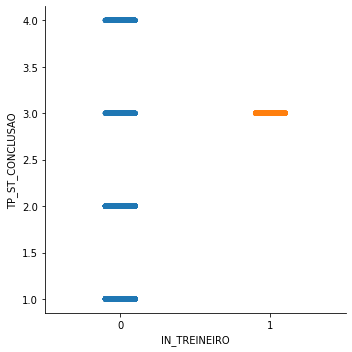

In [21]:
## Normalized Distribution

sns.catplot(x='IN_TREINEIRO', y='TP_ST_CONCLUSAO', data=df)

In [22]:
df = df.drop(columns=['IN_TREINEIRO'])

In [23]:
df['TP_ENSINO'].value_counts()

1.0    5228
3.0     502
2.0      32
Name: TP_ENSINO, dtype: int64

In [24]:
# Check for missing values
missing_values = df['TP_ENSINO'].isnull().sum()

print(f"Number of missing values: {missing_values}\nIt corresponds to {missing_values/18306 * 100} % of the data!")

Number of missing values: 12544
It corresponds to 68.52398120834698 % of the data!


In [25]:
df = df.drop(columns=['TP_ENSINO'])

<Figure size 720x360 with 0 Axes>

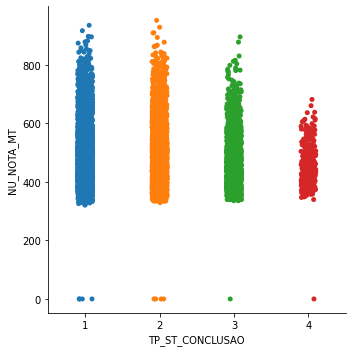

In [26]:
plt.figure(figsize=(10,5))
sns.catplot(x='TP_ST_CONCLUSAO', y='NU_NOTA_MT', data=df)

<AxesSubplot:xlabel='TP_ST_CONCLUSAO', ylabel='NU_NOTA_MT'>

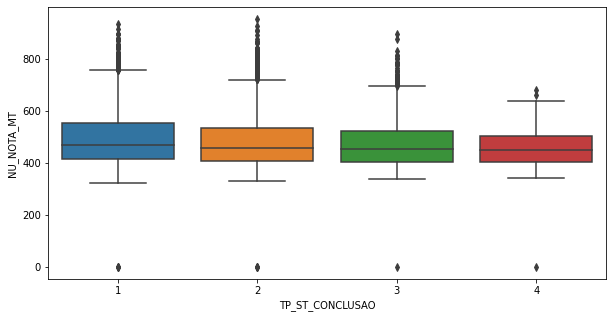

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='TP_ST_CONCLUSAO', y='NU_NOTA_MT', data=df)

In [28]:
df['NU_NOTA_MT'].value_counts()

445.3    13
422.4    12
419.2    12
441.6    12
417.7    12
         ..
532.2     1
734.5     1
393.1     1
783.0     1
634.1     1
Name: NU_NOTA_MT, Length: 3406, dtype: int64

In [29]:
df['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

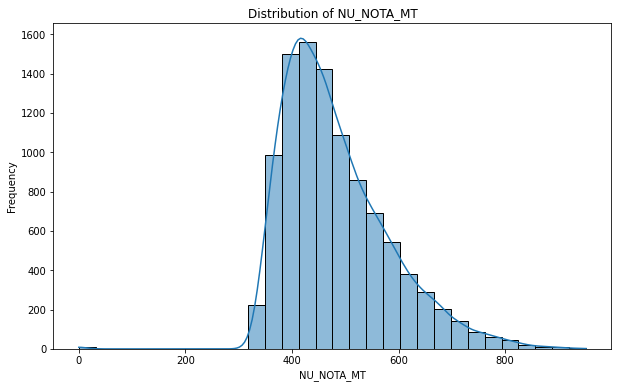

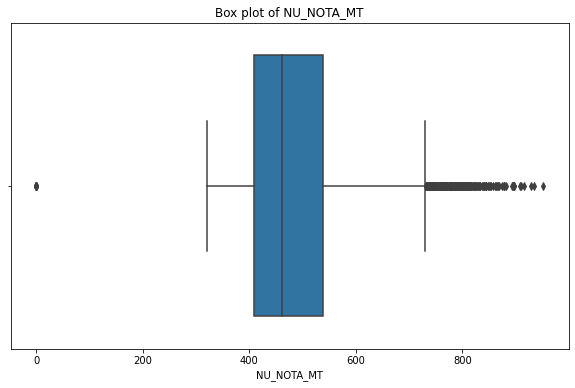

In [30]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['NU_NOTA_MT'], bins=30, kde=True)
plt.title('Distribution of NU_NOTA_MT')
plt.xlabel('NU_NOTA_MT')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NU_NOTA_MT'])
plt.title('Box plot of NU_NOTA_MT')
plt.xlabel('NU_NOTA_MT')
plt.show()

In [31]:
# Check for missing values
missing_values = df['NU_NOTA_MT'].isnull().sum()

# Fill missing values (e.g., with mean or median)
# df['NU_NOTA_MT'].fillna(df['NU_NOTA_MT'].mean(), inplace=True)

print(f"Number of missing values: {missing_values}\nIt corresponds to {missing_values/18306 * 100:.2f} % of the data!")

Number of missing values: 8173
It corresponds to 44.65 % of the data!


Analizando presença

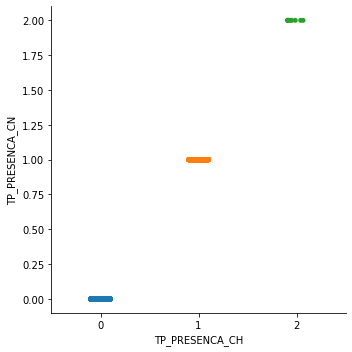

In [32]:
## Normalized Distribution

sns.catplot(x='TP_PRESENCA_CH', y='TP_PRESENCA_CN', data=df)

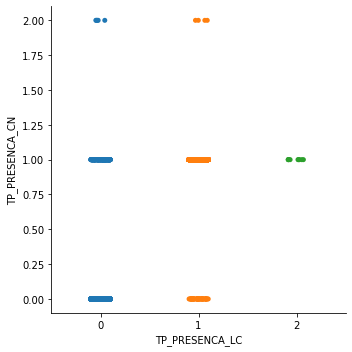

In [33]:
sns.catplot(x='TP_PRESENCA_LC', y='TP_PRESENCA_CN', data=df)

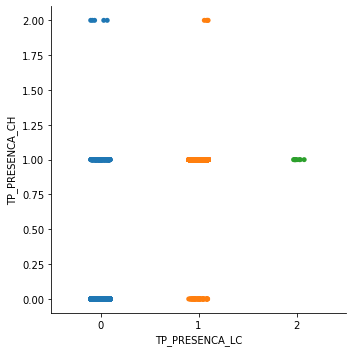

In [34]:
sns.catplot(x='TP_PRESENCA_LC', y='TP_PRESENCA_CH', data=df)

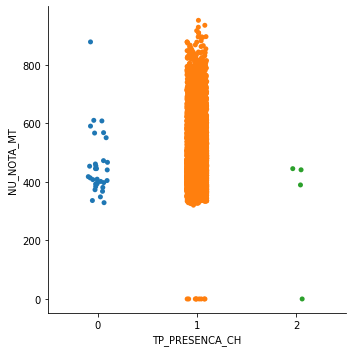

In [35]:
sns.catplot(x='TP_PRESENCA_CH', y='NU_NOTA_MT', data=df)

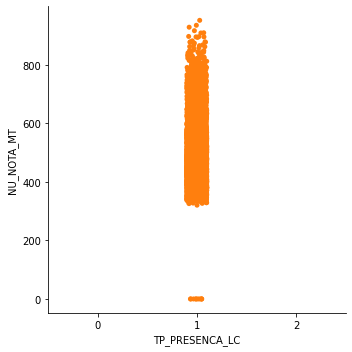

In [36]:
sns.catplot(x='TP_PRESENCA_LC', y='NU_NOTA_MT', data=df)

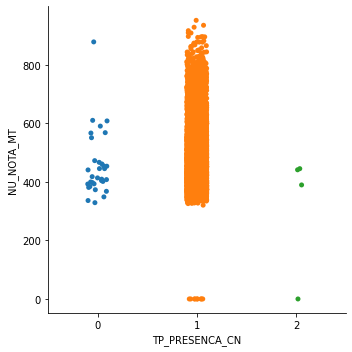

In [37]:
sns.catplot(x='TP_PRESENCA_CN', y='NU_NOTA_MT', data=df)

Removing the lines in which the person was not present for the LC and MT test, given that they were in the same day. There is no point in predicting the grade of the person that was not there.

In [38]:
# df_filtered = df.copy()
# df_filtered = df[~df['TP_PRESENCA_LC'].isin([0, 2])]

df_filtered = df.loc[~df['TP_PRESENCA_LC'].isin([0, 2])].copy()

In [39]:
df_filtered

,Unnamed: 0,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,NU_IDADE,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,0,1,1,1,24,1,436.3,495.4,581.2,399.4,1.0,520.0
1,1,1,1,1,17,2,474.5,544.1,599.0,459.8,1.0,580.0
5,5,1,1,1,18,1,439.7,583.2,410.9,364.5,1.0,620.0
6,6,1,1,1,18,2,420.1,604.2,484.5,529.2,1.0,560.0
7,7,1,1,1,18,1,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18300,18300,1,1,1,18,2,465.9,602.3,603.9,NaN,1.0,540.0
18301,18301,1,1,1,17,2,398.3,558.2,511.6,NaN,1.0,500.0
18302,18302,1,1,1,17,2,427.6,579.7,471.1,NaN,1.0,520.0
18303,18303,1,1,1,19,1,639.2,643.8,604.9,NaN,1.0,640.0


In [40]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13510 entries, 0 to 18304
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         13510 non-null  int64  
 1   TP_PRESENCA_CH     13510 non-null  int64  
 2   TP_PRESENCA_CN     13510 non-null  int64  
 3   TP_PRESENCA_LC     13510 non-null  int64  
 4   NU_IDADE           13510 non-null  int64  
 5   TP_ST_CONCLUSAO    13510 non-null  int64  
 6   NU_NOTA_CN         13457 non-null  float64
 7   NU_NOTA_CH         13457 non-null  float64
 8   NU_NOTA_LC         13510 non-null  float64
 9   NU_NOTA_MT         10133 non-null  float64
 10  TP_STATUS_REDACAO  13510 non-null  float64
 11  NU_NOTA_REDACAO    13510 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.3 MB


In [41]:
# Check for missing values
missing_values = df_filtered['NU_NOTA_MT'].isnull().sum()

# Remove rows where 'NU_NOTA_MT' is 0 or NaN
df_filtered = df_filtered[(df_filtered['NU_NOTA_MT'] != 0) & (df_filtered['NU_NOTA_MT'].notna())]

print(f"Number of missing values: {missing_values}\nIt corresponds to {missing_values/13510 * 100:.2f} % of the data!")

Number of missing values: 3377
It corresponds to 25.00 % of the data!


In [42]:
df_filtered = df_filtered.drop(columns=['TP_PRESENCA_CH','TP_PRESENCA_CN','TP_PRESENCA_LC'])

In [43]:
df_filtered

,Unnamed: 0,NU_IDADE,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,0,24,1,436.3,495.4,581.2,399.4,1.0,520.0
1,1,17,2,474.5,544.1,599.0,459.8,1.0,580.0
5,5,18,1,439.7,583.2,410.9,364.5,1.0,620.0
6,6,18,2,420.1,604.2,484.5,529.2,1.0,560.0
7,7,18,1,619.6,625.8,611.2,566.7,1.0,620.0
...,...,...,...,...,...,...,...,...,...
13725,13725,20,1,438.2,419.7,394.5,403.2,1.0,440.0
13726,13726,33,1,423.8,557.9,533.0,452.4,1.0,560.0
13727,13727,15,3,460.5,528.9,569.3,398.0,1.0,600.0
13728,13728,36,4,422.5,621.7,569.0,386.6,1.0,460.0


TP_STATUS_REDACAO:

In [44]:
df_filtered['TP_STATUS_REDACAO'].value_counts()

1.0    9884
4.0      95
6.0      84
9.0      20
3.0      16
8.0       8
5.0       8
7.0       6
2.0       2
Name: TP_STATUS_REDACAO, dtype: int64

In [45]:
df_filtered = df_filtered.drop(columns=['TP_STATUS_REDACAO'])

Idade:

<AxesSubplot:title={'center':'NU_IDADE'}>

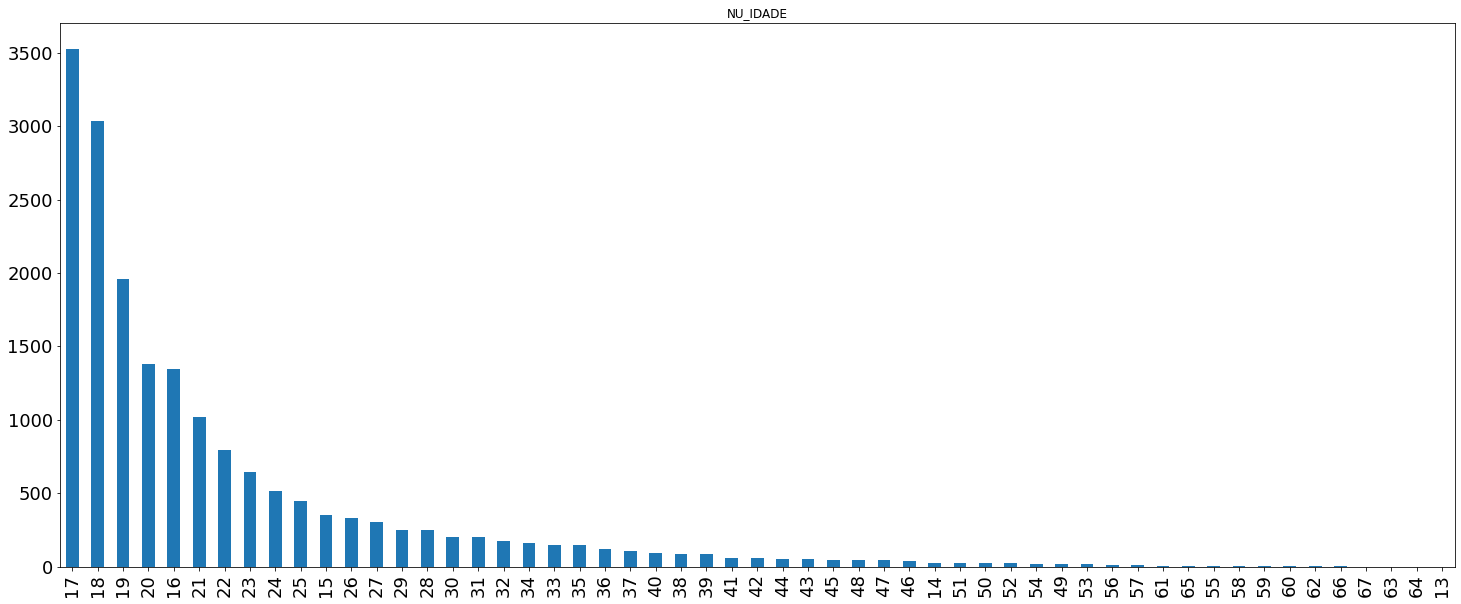

In [46]:
df['NU_IDADE'].value_counts().plot(kind='bar', figsize=(25,10), title='NU_IDADE', fontsize=18)

<Figure size 720x360 with 0 Axes>

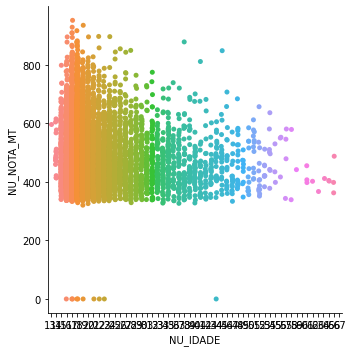

In [47]:
plt.figure(figsize=(10,5))
sns.catplot(x='NU_IDADE', y='NU_NOTA_MT', data=df)

<AxesSubplot:xlabel='NU_IDADE', ylabel='NU_NOTA_MT'>

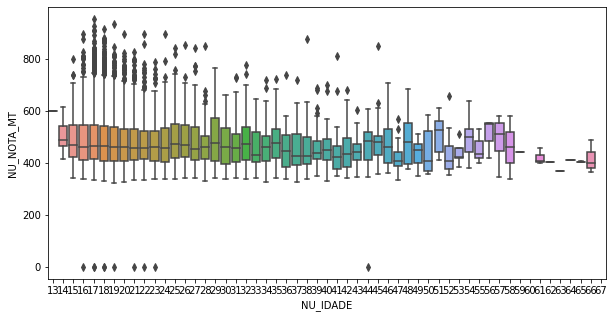

In [48]:
plt.figure(figsize=(10,5))
sns.boxplot(x='NU_IDADE', y='NU_NOTA_MT', data=df)

In [49]:
df_filtered = df_filtered.drop(columns=['NU_IDADE'])

In [50]:
df_filtered = df_filtered.drop(columns=['Unnamed: 0'])

In [51]:
df_filtered

,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1,436.3,495.4,581.2,399.4,520.0
1,2,474.5,544.1,599.0,459.8,580.0
5,1,439.7,583.2,410.9,364.5,620.0
6,2,420.1,604.2,484.5,529.2,560.0
7,1,619.6,625.8,611.2,566.7,620.0
...,...,...,...,...,...,...
13725,1,438.2,419.7,394.5,403.2,440.0
13726,1,423.8,557.9,533.0,452.4,560.0
13727,3,460.5,528.9,569.3,398.0,600.0
13728,4,422.5,621.7,569.0,386.6,460.0


In [52]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10123 entries, 0 to 13729
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TP_ST_CONCLUSAO  10123 non-null  int64  
 1   NU_NOTA_CN       10088 non-null  float64
 2   NU_NOTA_CH       10088 non-null  float64
 3   NU_NOTA_LC       10123 non-null  float64
 4   NU_NOTA_MT       10123 non-null  float64
 5   NU_NOTA_REDACAO  10123 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 553.6 KB


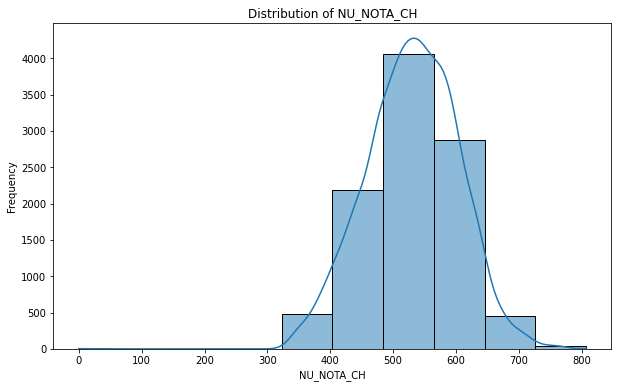

In [53]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['NU_NOTA_CH'], kde=True, bins=10)
plt.title('Distribution of NU_NOTA_CH')
plt.xlabel('NU_NOTA_CH')
plt.ylabel('Frequency')
plt.show()

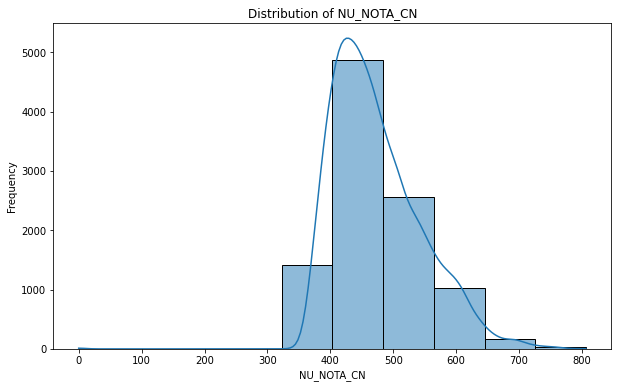

In [54]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['NU_NOTA_CN'], kde=True, bins=10)
plt.title('Distribution of NU_NOTA_CN')
plt.xlabel('NU_NOTA_CN')
plt.ylabel('Frequency')
plt.show()

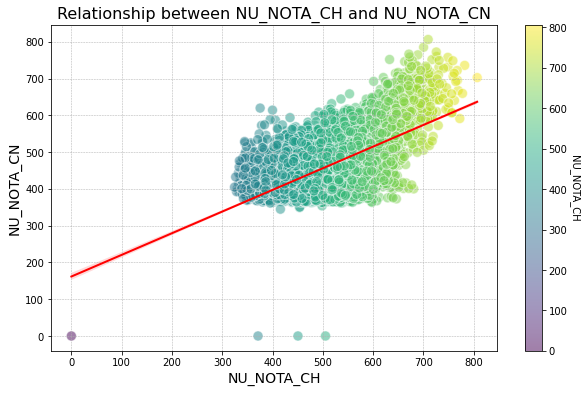

In [55]:
# Scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NU_NOTA_CH'], df_filtered['NU_NOTA_CN'], alpha=0.5, edgecolor='w', s=100, c=df_filtered['NU_NOTA_CH'], cmap='viridis')

# Titles and labels
plt.title('Relationship between NU_NOTA_CH and NU_NOTA_CN', fontsize=16)
plt.xlabel('NU_NOTA_CH (Nota Ciências Humanas)', fontsize=14)
plt.ylabel('NU_NOTA_CN (Nota Ciências da Natureza)', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Color bar
cbar = plt.colorbar()
cbar.set_label('NU_NOTA_CH', rotation=270, labelpad=12)

# Trend line
sns.regplot(x='NU_NOTA_CH', y='NU_NOTA_CN', data=df_filtered, scatter=False, color='red', line_kws={'linewidth':2})

# Show plot
plt.show()

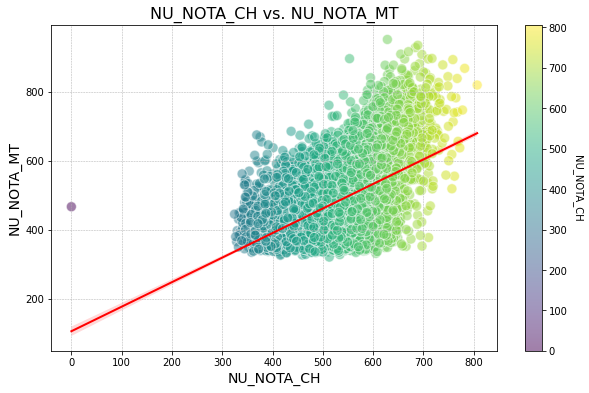

In [56]:
# Scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NU_NOTA_CH'], df_filtered['NU_NOTA_MT'], alpha=0.5, edgecolor='w', s=100, c=df_filtered['NU_NOTA_CH'], cmap='viridis')

# Titles and labels
plt.title('NU_NOTA_CH vs. NU_NOTA_MT', fontsize=16)
plt.xlabel('NU_NOTA_CH (Nota Ciências Humanas)', fontsize=14)
plt.ylabel('NU_NOTA_MT (Nota Matemática)', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Color bar
cbar = plt.colorbar()
cbar.set_label('NU_NOTA_CH', rotation=270, labelpad=15)

# Trend line
sns.regplot(x='NU_NOTA_CH', y='NU_NOTA_MT', data=df_filtered, scatter=False, color='red', line_kws={'linewidth':2})

# Show plot
plt.show()


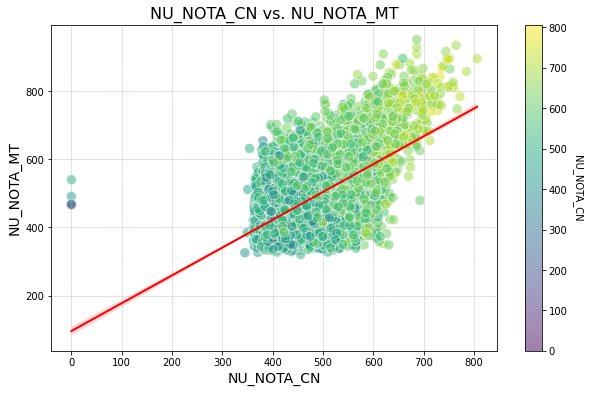

In [57]:
# Scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NU_NOTA_CN'], df_filtered['NU_NOTA_MT'], alpha=0.5, edgecolor='w', s=100, c=df_filtered['NU_NOTA_CH'], cmap='viridis')

# Titles and labels
plt.title('NU_NOTA_CN vs. NU_NOTA_MT', fontsize=16)
plt.xlabel('NU_NOTA_CN (Nota Ciências da Natureza)', fontsize=14)
plt.ylabel('NU_NOTA_MT (Nota Matemática)', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Color bar
cbar = plt.colorbar()
cbar.set_label('NU_NOTA_CN', rotation=270, labelpad=15)

# Trend line
sns.regplot(x='NU_NOTA_CN', y='NU_NOTA_MT', data=df_filtered, scatter=False, color='red', line_kws={'linewidth':2})

# Show plot
plt.show()

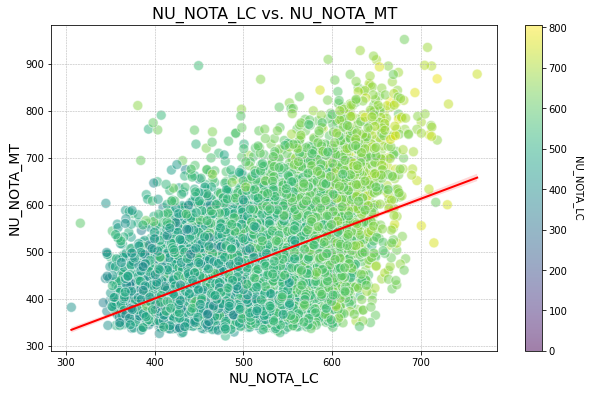

In [58]:
# Scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NU_NOTA_LC'], df_filtered['NU_NOTA_MT'], alpha=0.5, edgecolor='w', s=100, c=df_filtered['NU_NOTA_CH'], cmap='viridis')

# Titles and labels
plt.title('NU_NOTA_LC vs. NU_NOTA_MT', fontsize=16)
plt.xlabel('NU_NOTA_LC (Nota Linguagens e Códigos)', fontsize=14)
plt.ylabel('NU_NOTA_MT (Nota Matemática)', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Color bar
cbar = plt.colorbar()
cbar.set_label('NU_NOTA_LC', rotation=270, labelpad=15)

# Trend line
sns.regplot(x='NU_NOTA_LC', y='NU_NOTA_MT', data=df_filtered, scatter=False, color='red', line_kws={'linewidth':2})

# Show plot
plt.show()

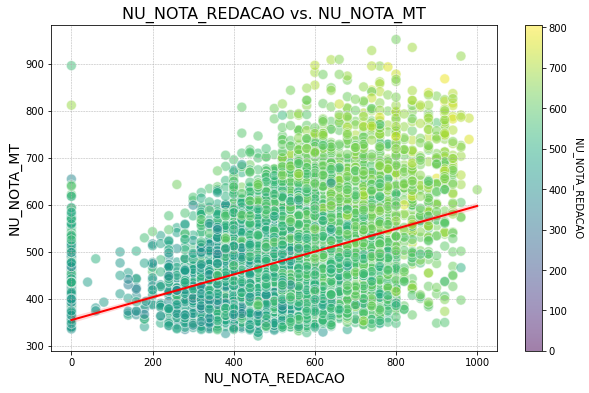

In [59]:
# Scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['NU_NOTA_REDACAO'], df_filtered['NU_NOTA_MT'], alpha=0.5, edgecolor='w', s=100, c=df_filtered['NU_NOTA_CH'], cmap='viridis')

# Titles and labels
plt.title('NU_NOTA_REDACAO vs. NU_NOTA_MT', fontsize=16)
plt.xlabel('NU_NOTA_REDACAO (Nota Redação)', fontsize=14)
plt.ylabel('NU_NOTA_MT (Nota Matemática)', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Color bar
cbar = plt.colorbar()
cbar.set_label('NU_NOTA_REDACAO', rotation=270, labelpad=15)

# Trend line
sns.regplot(x='NU_NOTA_REDACAO', y='NU_NOTA_MT', data=df_filtered, scatter=False, color='red', line_kws={'linewidth':2})

# Show plot
plt.show()

In [60]:
# Check for missing values
missing_values = df_filtered['NU_NOTA_LC'].isnull().sum()

# Fill missing values (e.g., with mean or median)
df_filtered['NU_NOTA_LC'].fillna(df_filtered['NU_NOTA_LC'].mean(), inplace=True)
df_filtered = df_filtered[(df_filtered['NU_NOTA_LC'] != 0)]

print(f"Number of missing values: {missing_values}\nIt corresponds to {missing_values/10123 * 100:.2f} % of the data!")

Number of missing values: 0
It corresponds to 0.00 % of the data!


In [61]:
# Check for missing values
missing_values = df_filtered['NU_NOTA_CN'].isnull().sum()

# Fill missing values (e.g., with mean or median)
df_filtered['NU_NOTA_CN'].fillna(df_filtered['NU_NOTA_CN'].mean(), inplace=True)
df_filtered = df_filtered[(df_filtered['NU_NOTA_CN'] != 0)]

print(f"Number of missing values: {missing_values}\nIt corresponds to {missing_values/10123 * 100:.2f} % of the data!")

Number of missing values: 35
It corresponds to 0.35 % of the data!


In [62]:
# Calculate correlation between 'A' and 'B'
correlation = df_filtered['NU_NOTA_MT'].corr(df_filtered['NU_NOTA_CN'])
print(f"Correlation between NU_NOTA_MT and NU_NOTA_CN: {correlation}")

Correlation between NU_NOTA_MT and NU_NOTA_CN: 0.5900818486589237


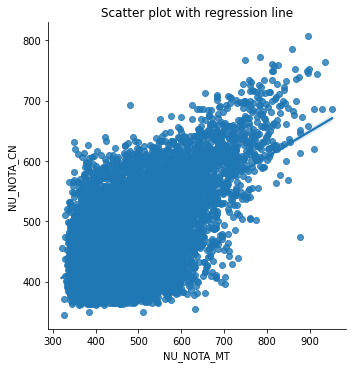

In [63]:
# Scatter plot with regression line
sns.lmplot(x='NU_NOTA_MT', y='NU_NOTA_CN', data=df_filtered)
plt.title('Scatter plot with regression line')
plt.xlabel('NU_NOTA_MT')
plt.ylabel('NU_NOTA_CN')
plt.show()

In [64]:
df_filtered = df_filtered.drop(columns=['NU_NOTA_CH', 'NU_NOTA_REDACAO'])

In [65]:
df_filtered

,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT
0,1,436.3,581.2,399.4
1,2,474.5,599.0,459.8
5,1,439.7,410.9,364.5
6,2,420.1,484.5,529.2
7,1,619.6,611.2,566.7
...,...,...,...,...
13725,1,438.2,394.5,403.2
13726,1,423.8,533.0,452.4
13727,3,460.5,569.3,398.0
13728,4,422.5,569.0,386.6


<AxesSubplot:>

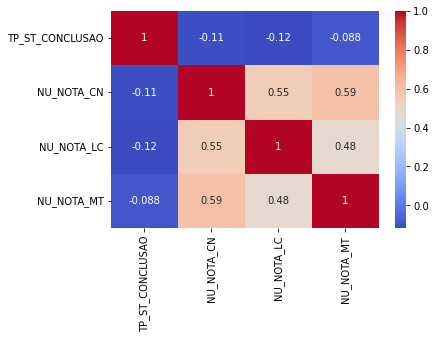

In [66]:
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')

In [67]:
df_filtered.head()

,TP_ST_CONCLUSAO,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT
0,1,436.3,581.2,399.4
1,2,474.5,599.0,459.8
5,1,439.7,410.9,364.5
6,2,420.1,484.5,529.2
7,1,619.6,611.2,566.7


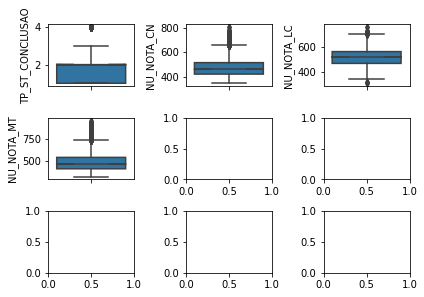

In [68]:
# Distribuição das variáveis preditoras e alvo

# Boxplots para todas as variáveis
names = df_filtered.columns
fig, axes = plt.subplots(3,3)

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=df_filtered, notch=True, ax=ax)
    
plt.tight_layout()

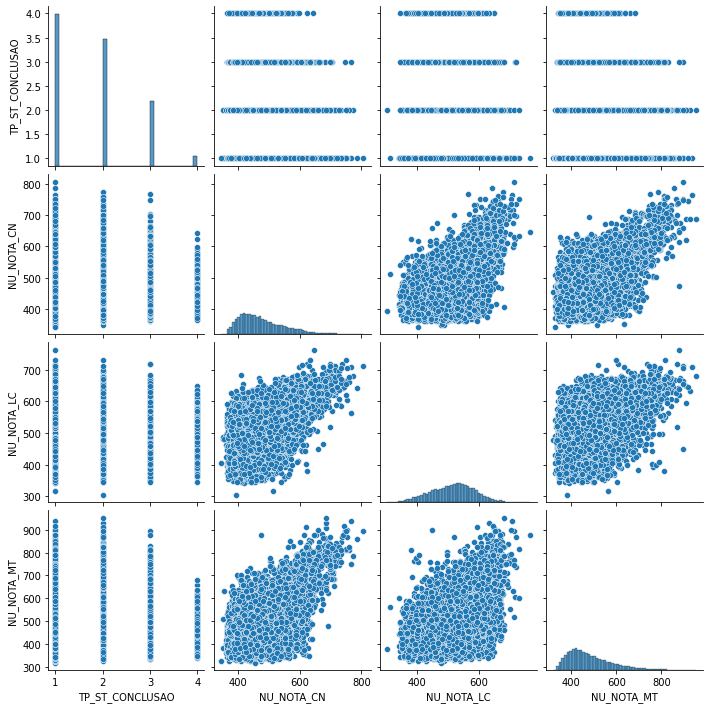

In [69]:
sns.pairplot(df_filtered)

In [70]:
# Padronizando as variáveis

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs = scaler.fit_transform(df_filtered)
dfs = pd.DataFrame(dfs)
dfs.columns = df_filtered.columns.values

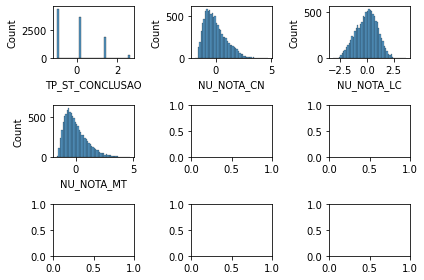

In [71]:
# Histogramas as variáveis escalonadas

names = dfs.columns
fig, axes = plt.subplots(3,3)

for name, ax in zip(names, axes.flatten()):
    sns.histplot(x=name, data=dfs, ax=ax)
plt.tight_layout()

Particionamento dos dados:

In [72]:
# Divisão aleatória

from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dfs.drop(['NU_NOTA_MT'], axis=1) # features
y = dfs['NU_NOTA_MT'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

print('y_test = ',y_test)
print('y_train = ',y_train)

y_test =  6400    0.954418
819    -1.090572
1788   -0.350162
7974   -1.054109
9809   -0.952822
          ...   
1571    1.643172
1731   -0.081751
3592    0.065116
7721   -1.354932
5909    0.222111
Name: NU_NOTA_MT, Length: 2024, dtype: float64
y_train =  2608   -1.478503
1852    0.283896
3779    0.368978
8150   -0.457527
1344   -0.969028
          ...   
7200    0.721458
6132    0.290987
9733   -0.284325
4089   -0.086815
9473   -0.878882
Name: NU_NOTA_MT, Length: 8095, dtype: float64


In [73]:
# ## Amostragem estratificada - IDADE

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# print('y_test = ',y_test)
# print('y_train = ',y_train)

In [74]:
## K-fold

# from numpy import array
# from sklearn.model_selection import KFold

# # Exemplo de um conjunto de dados
# data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# # Configurando a divisão
# kf = KFold(n_splits=3, random_state=42, shuffle=True)

# # Usa a função split para fazer a divisão e mostra o resultado
# for train, test in kf.split(data):
#  print('y_train: %s, y_test: %s' % (data[train], data[test]))

Regressão Multilinear

In [75]:
## Regressão Linear Simples - sklearn

from sklearn import linear_model

regr = linear_model.LinearRegression() # Create regressor
regr.fit(X_train, y_train) # Train regressor

print('Intercepto:', regr.intercept_)
print('Coeficientes:', regr.coef_)
print('R^2 = ', regr.score(X_train, y_train)) # Coefficient of determination R^2

Intercepto: -0.004423759907880092
Coeficientes: [-0.00917918  0.45984811  0.21999207]
R^2 =  0.37646850619759964


In [76]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

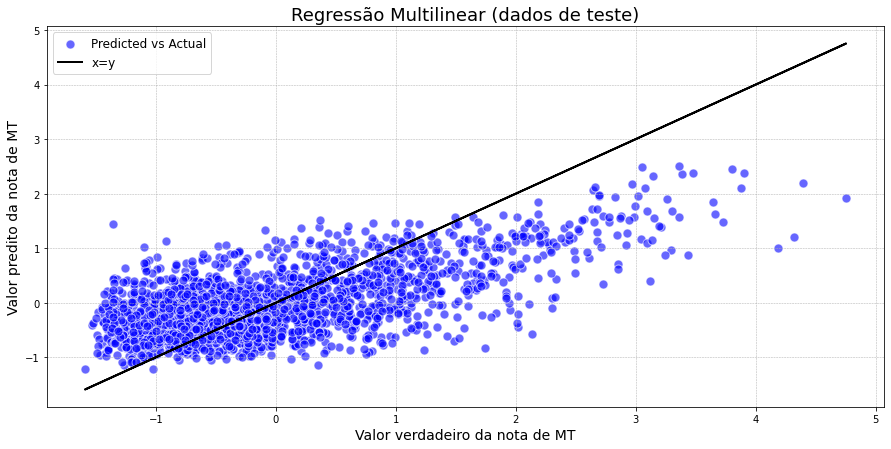

In [77]:
# Figure size
plt.figure(figsize=(15, 7))

# Scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='w', s=80, c='blue', label='Predicted vs Actual')

# Plot x=y line
plt.plot(y_test, y_test, color='black', label='x=y', linewidth=2)

# Titles and labels
plt.title('Regressão Multilinear (dados de teste)', fontsize=18)
plt.xlabel('Valor verdadeiro da nota de MT', fontsize=14)
plt.ylabel('Valor predito da nota de MT', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(fontsize=12)

# Show plot
plt.show()

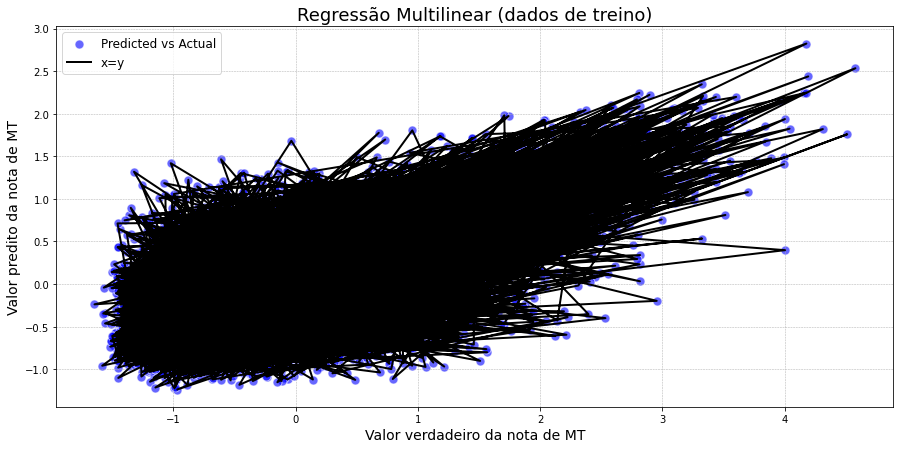

In [78]:
# Figure size
plt.figure(figsize=(15, 7))

# Scatter plot
plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolor='w', s=80, c='blue', label='Predicted vs Actual')

# Plot x=y line
plt.plot(y_train, y_train_pred, color='black', label='x=y', linewidth=2)

# Titles and labels
plt.title('Regressão Multilinear (dados de treino)', fontsize=18)
plt.xlabel('Valor verdadeiro da nota de MT', fontsize=14)
plt.ylabel('Valor predito da nota de MT', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(fontsize=12)

# Show plot
plt.show()

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Training set evaluation:')
print('R^2 = ', r2_score(y_train, y_train_pred))
print('MSE = ', mean_squared_error(y_train, y_train_pred))
print('MAE = ', mean_absolute_error(y_train, y_train_pred))

print('\nTest set evaluation:')
print('R^2 = ', r2_score(y_test, y_test_pred))
print('MSE = ', mean_squared_error(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))

Training set evaluation:
R^2 =  0.37646850619759964
MSE =  0.6089896440534508
MAE =  0.6226197133158348

Test set evaluation:
R^2 =  0.41432053136658487
MSE =  0.6399841387360278
MAE =  0.6335096109402734


In [80]:
# # Gráfico quantil-quantil (QQ plot)

# import statsmodels.api as sm

# resid = y_pred - y_train
# sm.qqplot(resid.to_numpy(), line='45')

In [81]:
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# print('R^2 = ', r2_score(y_train, y_pred))
# print('MSE = ', mean_squared_error(y_train, y_pred))
# print('MAE = ', mean_absolute_error(y_train, y_pred))

Random Forest Regressor

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=25, random_state=28)
regr.fit(X_train, y_train)

# y_pred = regr.predict(X_test)

RandomForestRegressor(max_depth=25, random_state=28)

In [83]:
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

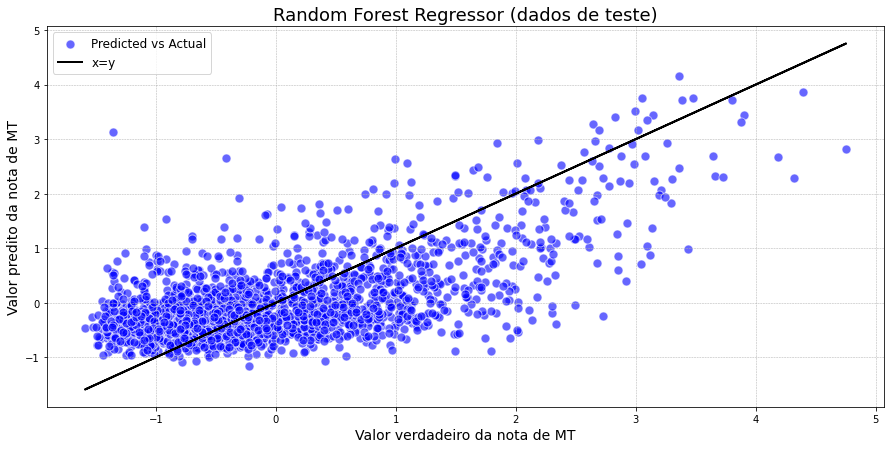

In [84]:
# Figure size
plt.figure(figsize=(15, 7))

# Scatter plot
plt.scatter(y_test, y_test_pred, alpha=0.6, edgecolor='w', s=80, c='blue', label='Predicted vs Actual')

# Plot x=y line
plt.plot(y_test, y_test, color='black', label='x=y', linewidth=2)

# Titles and labels
plt.title('Random Forest Regressor (dados de teste)', fontsize=18)
plt.xlabel('Valor verdadeiro da nota de MT', fontsize=14)
plt.ylabel('Valor predito da nota de MT', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(fontsize=12)

# Show plot
plt.show()

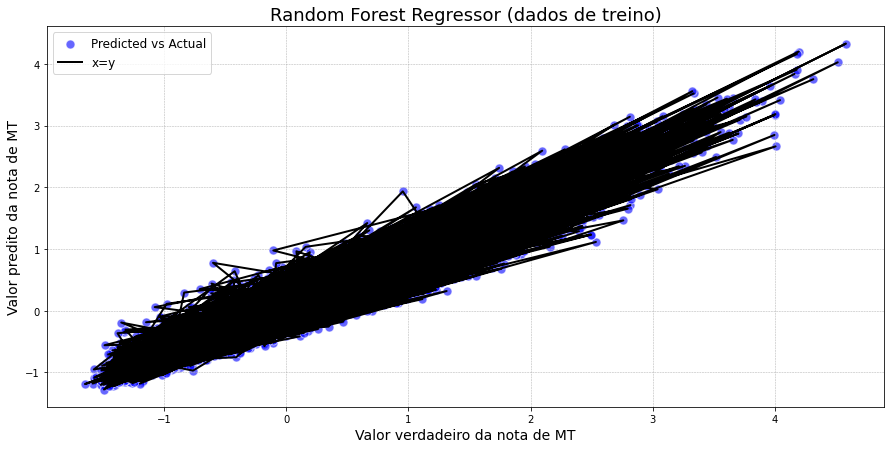

In [85]:
# Figure size
plt.figure(figsize=(15, 7))

# Scatter plot
plt.scatter(y_train, y_train_pred, alpha=0.6, edgecolor='w', s=80, c='blue', label='Predicted vs Actual')

# Plot x=y line
plt.plot(y_train, y_train_pred, color='black', label='x=y', linewidth=2)

# Titles and labels
plt.title('Random Forest Regressor (dados de treino)', fontsize=18)
plt.xlabel('Valor verdadeiro da nota de MT', fontsize=14)
plt.ylabel('Valor predito da nota de MT', fontsize=14)

# Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a legend
plt.legend(fontsize=12)

# Show plot
plt.show()

In [86]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('Training set evaluation:')
print('R^2 = ', r2_score(y_train, y_train_pred))
print('MSE = ', mean_squared_error(y_train, y_train_pred))
print('MAE = ', mean_absolute_error(y_train, y_train_pred))

print('\nTest set evaluation:')
print('R^2 = ', r2_score(y_test, y_test_pred))
print('MSE = ', mean_squared_error(y_test, y_test_pred))
print('MAE = ', mean_absolute_error(y_test, y_test_pred))

Training set evaluation:
R^2 =  0.8956994523917766
MSE =  0.10186807562063742
MAE =  0.2521628104108998

Test set evaluation:
R^2 =  0.3937881980498241
MSE =  0.6624202464668127
MAE =  0.6420432481732505
